<a href="https://colab.research.google.com/github/gauravreddy08/learning-pytorch/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PyTorch** workflow
https://www.learnpytorch.io/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Device: {device}')

Device: cuda


## Getting **data** ready

In [3]:
weight = 0.7
bias = 0.3

X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
y = weight*(X) + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
X_train = X[:int(0.8*len(X))]
X_test = X[int(0.8*len(X)):]

y_train = y[:int(0.8*len(y))]
y_test = y[int(0.8*len(y)):]

In [5]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# len(X_train), len(X_test), len(y_train), len(y_test)

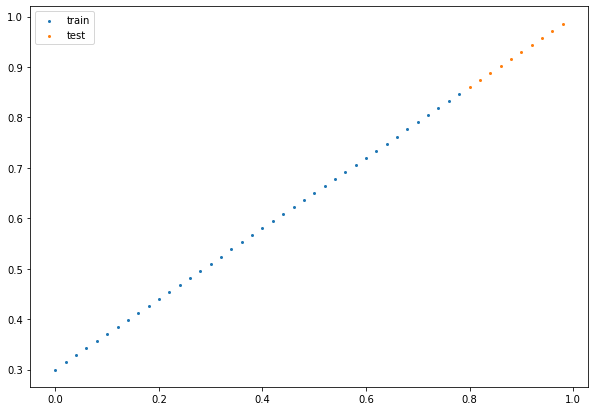

In [6]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=4, label='train')
plt.scatter(X_test, y_test, s=4, label='test')
plt.legend();

## Modeling **Linear Regression** inherting `nn.Module`

In [7]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__() # this will call the init from main class `Module`
    
    # Initiate random wieghts and bias
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    
  def forward(self, x: torch.Tensor) -> torch.Tensor: # Overwriting main fowrad method
    return self.weights * x + self.bias

In [8]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

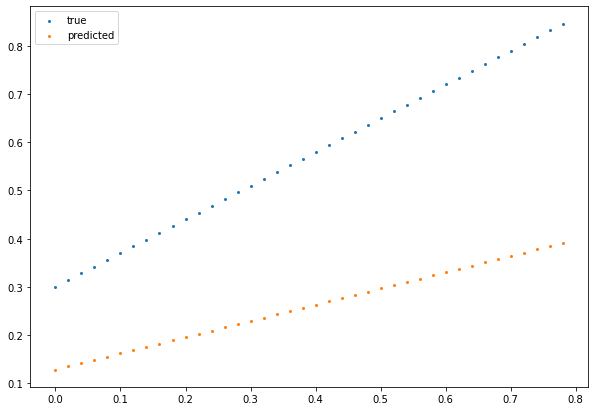

In [9]:
with torch.inference_mode():
  y_pred_in = model_0(X_train)

plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=4, label='true')
plt.scatter(X_train, y_pred_in, s=4, label='predicted')
plt.legend();

### Defining **loss** function and **optimizer**

https://pytorch.org/docs/stable/nn.html#loss-functions

In [10]:
# setup the loss function
loss_fn = nn.L1Loss() # mae

# setup the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

### Building the **training loop**

```
0. Loop through the data
1. Forward pass (forward propagation)
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (back propagation)
5. Optimizer step
```


https://pytorch.org/docs/stable/autograd.html

In [11]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [12]:
epochs = 150
epoch_count = []
loss_count = []
train_loss_values = []

for epoch in range(epochs):
  model_0.train()

  y_pred = model_0(X_train) # 1
  loss = loss_fn(y_pred, y_train) # 2

  optimizer.zero_grad() # 3
  loss.backward() # 4
  optimizer.step() # 5

  # Testing 
  model_0.eval() 
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test)
  if epoch%10==0:
    epoch_count.append(epoch)
    loss_count.append(test_loss.detach().numpy())
    train_loss_values.append(loss.detach().numpy())
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
Epoch: 30 | Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
Epoch: 40 | Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
Epoch: 50 | Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
Epoch: 60 | Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
Epoch: 70 | Loss: 0.03476089984178543 | Test Loss: 0.0805937647819519
Epoch: 80 | Loss: 0.03132382780313492 | Test Loss: 0.07232122868299484
Epoch: 90 | Loss: 0.02788739837706089 | Test Loss: 0.06473556160926819
Epoch: 100 | Loss: 0.024458957836031914 | Test Loss: 0.05646304413676262
Epoch: 110 | Loss: 0.021020207554101944 | Test Loss: 0.04819049686193466
Epoch: 120 | Loss: 0.01758546568453312 | Test Loss: 0.04060482233762741
Epoch: 130 | Loss: 0.014155393466353416 | Test Loss: 0.03233227878808975
Ep

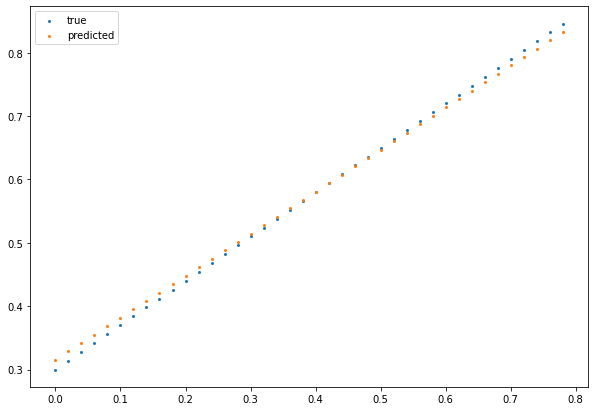

In [13]:
with torch.inference_mode():
  y_pred = model_0(X_train)

plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=4, label='true')
plt.scatter(X_train, y_pred, s=4, label='predicted')
plt.legend();

In [14]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6638])), ('bias', tensor([0.3153]))])

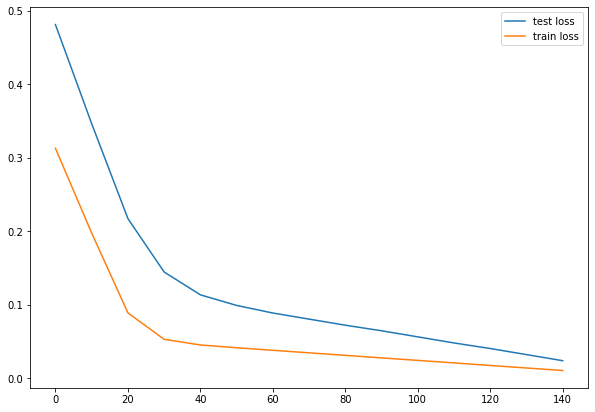

In [15]:
plt.figure(figsize=(10, 7))
plt.plot(epoch_count, loss_count, label='test loss')
plt.plot(epoch_count, train_loss_values, label='train loss')
plt.legend();

### **Saving** the model

In [16]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6638])), ('bias', tensor([0.3153]))])

In [17]:
torch.save(model_0.state_dict(), "model_0.pth")

In [18]:
model_0.load_state_dict(torch.load("model_0.pth"))
model_0.state_dict()

OrderedDict([('weights', tensor([0.6638])), ('bias', tensor([0.3153]))])

## Modelling with **device agnostic code**

In [19]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__() # this will call the init from main class `Module`
    
    # Initiate random wieghts and bias
    self.linear_layer = nn.Linear(in_features=1, 
                                  out_features=1)
    
  def forward(self, x: torch.Tensor) -> torch.Tensor: # Overwriting main fowrad method
    return self.linear_layer(x)

In [20]:
torch.manual_seed(42)

model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [21]:
next(model_1.parameters()).device

device(type='cpu')

In [22]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [23]:
loss_fn = nn.L1Loss() # mae
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [24]:
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

In [25]:
epochs = 250
epoch_count = []
loss_count = []
train_loss_values = []

for epoch in range(epochs):
  model_1.train()

  y_pred = model_1(X_train) # 1
  loss = loss_fn(y_pred, y_train) # 2

  optimizer.zero_grad() # 3
  loss.backward() # 4
  optimizer.step() # 5

  # Testing 
  model_1.eval() 
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)
  if epoch%10==0:
    epoch_count.append(epoch)
    loss_count.append(test_loss.cpu().detach().numpy())
    train_loss_values.append(loss.cpu().detach().numpy())
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 0.5551779866218567 | Test Loss: 0.5739762187004089
Epoch: 10 | Loss: 0.439968079328537 | Test Loss: 0.4392664134502411
Epoch: 20 | Loss: 0.3247582018375397 | Test Loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355 | Test Loss: 0.16984669864177704
Epoch: 40 | Loss: 0.09433845430612564 | Test Loss: 0.03513690456748009
Epoch: 50 | Loss: 0.023886388167738914 | Test Loss: 0.04784907028079033
Epoch: 60 | Loss: 0.019956795498728752 | Test Loss: 0.045803118497133255
Epoch: 70 | Loss: 0.016517987474799156 | Test Loss: 0.037530567497015
Epoch: 80 | Loss: 0.013089174404740334 | Test Loss: 0.02994490973651409
Epoch: 90 | Loss: 0.009653178043663502 | Test Loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215683650225401 | Test Loss: 0.014086711220443249
Epoch: 110 | Loss: 0.00278724217787385 | Test Loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882
Epoch: 130 | Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416

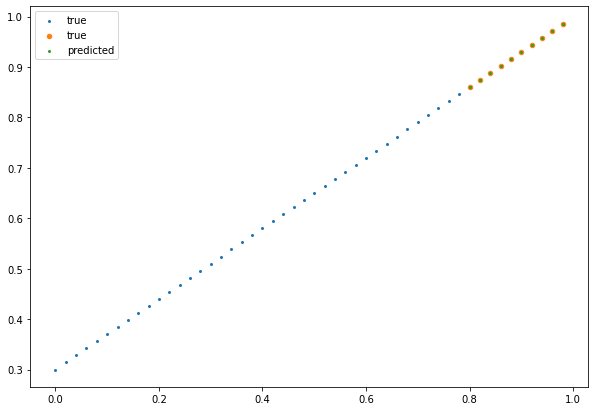

In [26]:
with torch.inference_mode():
  y_pred = model_1(X_test)

plt.figure(figsize=(10, 7))
plt.scatter(X_train.cpu(), y_train.cpu(), s=4, label='true')
plt.scatter(X_test.cpu(), y_test.cpu(), s=20, label='true')
plt.scatter(X_test.cpu(), y_pred.cpu(), s=4, label='predicted')
plt.legend();